<center> <img src = https://brightonbeerblog.com/wp-content/uploads/laine-logo-colour.png alt="drawing" style="width:150px;">

<center> Laine Brew Co. Brewpub in Brighton

<center> <img src = https://fastly.4sqi.net/img/general/600x600/56972_rCvjDmZ1QLUKNFb3p9mhHIA5WTMS05xq88Zpjz0QZYM.jpg alt="drawing" style="width:300px;">

### Аналитика бара The Laine Pub in London

**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты; определить группы популярных напитков и столов; поиск скрытых зависимостей; поиск наиболее эффективных барменов / официантов

**Бизнес-задача для дата-саентиста:** была в прогнозировании спроса на различные группы товаров и определении оптимального ассортимента продукциив оптимальное время работы бара; дополнительный поиск скрытых зависимостей

In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn import mixture
from sklearn import manifold
from sklearn import pipeline
from sklearn import preprocessing
from sklearn import cluster
from sklearn import metrics
from sklearn import model_selection
from sklearn import decomposition
from sklearn import ensemble
import warnings 

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

### 1. Подгрузка данных

In [2]:
# Имеется месячная статистика продаж в баре 
data = pd.read_excel('data/sales_b.xlsx')
display(data)

,Sale ID,Sale Date,Sale Time,Order Status,Register,Staff,Product ID,Product Name,Category,Item Type,...,Line Discount,Sale Discount,VAT Description,VAT Rate,Net,VAT,Total,Eat-in/Takeaway,Item Notes,Promotion
0,b36994de-903e-4043-bf80-3faf06d063a8,2023-11-01,00:01:50,COMPLETED,Register 2 (Downstairs) - Main Bar Middle,Carly,082172be-e0d5-4186-ad80-ec1ddbb45f28,Sambuca - White,Spirit - Shots,Product,...,0,0,20% VAT,20,24.50,4.90,29.40,NaN,NaN,NaN
1,fecf5d08-4365-4fda-be45-bf8bfc561133,2023-11-01,00:02:47,COMPLETED,Register 3 (Downstairs) - Main Bar Right,Carly,0d9a2446-929a-495e-b916-a6f11446070e,Sailor Jerry Spiced - Single,Spirit - Rum,Product,...,0,0,20% VAT,20,5.42,1.08,6.50,NaN,1 x Pepsi Max - £1.45\n,NaN
2,fecf5d08-4365-4fda-be45-bf8bfc561133,2023-11-01,00:02:47,COMPLETED,Register 2 (Downstairs) - Main Bar Middle,Max,f8e6e7f2-c0f2-49fe-a4da-d7ce88549a2b,Sauvignon Blanc - Valdivieso - 175ml,Wine - White,Product,...,0,0,20% VAT,20,6.17,1.23,7.40,NaN,NaN,NaN
3,fecf5d08-4365-4fda-be45-bf8bfc561133,2023-11-01,00:02:47,COMPLETED,Register 3 (Downstairs) - Main Bar Right,Carly,35b0bae7-b7cb-4b21-adaf-6a86de5abca4,Amstel - Pint,Beer - Draught,Product,...,0,0,20% VAT,20,5.13,1.02,6.15,NaN,NaN,NaN
4,fecf5d08-4365-4fda-be45-bf8bfc561133,2023-11-01,00:02:47,COMPLETED,Register 3 (Downstairs) - Main Bar Right,Carly,35b0bae7-b7cb-4b21-adaf-6a86de5abca4,Amstel - Pint,Beer - Draught,Product,...,0,0,20% VAT,20,5.13,1.02,6.15,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15307,b319da54-d735-4318-b37a-895803da7d58,2023-11-19,22:43:28,COMPLETED,Register 2 (Downstairs) - Main Bar Middle,Mikala,ca141e7f-7d8b-4eb8-9a99-63038dea0281,Orchard Thieves - Pint,Cider - Draught,Product,...,0,0,20% VAT,20,5.63,1.12,6.75,NaN,NaN,NaN
15308,b319da54-d735-4318-b37a-895803da7d58,2023-11-19,22:43:28,COMPLETED,Register 3 (Downstairs) - Main Bar Right,Howie,06f4f511-43d7-4249-8054-b1bfffaff298,Guinness - Pint,Beer - Draught,Product,...,0,0,20% VAT,20,5.54,1.11,6.65,NaN,NaN,NaN
15309,b319da54-d735-4318-b37a-895803da7d58,2023-11-19,22:43:28,COMPLETED,Register 1 (app) - Main Bar Left,Eli,f04bc17d-ca0f-48be-8089-78a2f8d596c4,Smirnoff Black - Single,Spirit - Vodka,Product,...,0,0,20% VAT,20,5.42,1.08,6.50,NaN,1 x Pepsi - £1.45\n,NaN
15310,b319da54-d735-4318-b37a-895803da7d58,2023-11-19,22:43:28,COMPLETED,Register 3 (Downstairs) - Main Bar Right,Mikala,a5e3ebf2-bcc1-499e-9033-0190455b846b,Burnt Faith Brandy - Single,Spirit - Brandy,Product,...,0,0,20% VAT,20,5.71,1.14,6.85,NaN,1 x Pepsi - £1.45\n,NaN


### 2. Знакомство с данными

In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15312 entries, 0 to 15311
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sale ID          15312 non-null  object 
 1   Sale Date        15312 non-null  object 
 2   Sale Time        15312 non-null  object 
 3   Order Status     15312 non-null  object 
 4   Register         15098 non-null  object 
 5   Staff            15098 non-null  object 
 6   Product ID       15312 non-null  object 
 7   Product Name     15312 non-null  object 
 8   Category         15286 non-null  object 
 9   Item Type        15312 non-null  object 
 10  Quantity         15309 non-null  float64
 11  Unit Price       15312 non-null  float64
 12  Line Discount    15312 non-null  int64  
 13  Sale Discount    15312 non-null  int64  
 14  VAT Description  15312 non-null  object 
 15  VAT Rate         15312 non-null  int64  
 16  Net              15312 non-null  float64
 17  VAT         

None

In [4]:
# Проведем анализ уникальных признаков
data.nunique()

Sale ID            7889
Sale Date            19
Sale Time          7125
Order Status          1
Register              6
Staff                21
Product ID          531
Product Name        510
Category             44
Item Type             2
Quantity             25
Unit Price          194
Line Discount         1
Sale Discount         1
VAT Description       2
VAT Rate              2
Net                 370
VAT                 345
Total               370
Eat-in/Takeaway       0
Item Notes          160
Promotion             0
dtype: int64

Разберемся, что означает каждый из столбцов:

- Sale ID            - уникальный идентификационный номер продажи
- Sale Date          - дата продажи
- Sale Time          - время продажи
- Order Status       - статус операции
- Register           - расположение столика клиента в баре
- Staff              - официант
- Product ID         - уникальный номер товара
- Product Name       - наименование товара
- Category           - категория товара
- Item Type          - тип
- Quantity           - количество позиций товара
- Unit Price         - стоимость единицы товара
- Line Discount      - базовая скидка
- Sale Discount      - скидка при продаже
- VAT Description    - процент алкоголя
- VAT Rate           - "рейтинг" алькоголя
- Net                - стоимость товара
- VAT                - ндс
- Total              - стоимость товара с ндс
- Eat-in/Takeaway    - здесь или с собой
- Item Notes         - примечания
- Promotion          - продвижение

### 3. Предобработка и очистка данных

In [5]:
# удалим неинформативные признаки
data.drop(columns=["Unit Price", "Sale ID", "Item Type", "VAT Rate", "Net", "VAT", "Product ID", "Order Status", "Line Discount", "Sale Discount", "VAT Description", "Eat-in/Takeaway", "Promotion", "Item Notes"], inplace=True)

In [6]:
# проверим число дублирующихся записей и примем к сведению
duplicatedRows = data[data.duplicated()]
print(f'полностью дублирующихся записей {duplicatedRows.shape[0]}')

# фактические дубликаты в данной статистике отсутствуют ввиду специфики сбора данных: это одновременные продажи, удалять мы их не будем

полностью дублирующихся записей 1494


In [7]:
# преобразуем временные столбцы в формат datetime и обьединим их в новый столбец Date
data['Date'] = data['Sale Date'] + ' ' + data['Sale Time']
data['Date'] = pd.to_datetime(data['Date'])

data.drop(columns=["Sale Date", "Sale Time"], inplace=True)

In [8]:
# удалим позиции возврата
data.drop(index=data[data['Total'] <= 0].index, inplace=True)
data.describe()

,Quantity,Total,Date
count,15210.000000,15210.000000,15210
mean,1.192505,8.910013,2023-11-11 07:01:30.210716672
min,1.000000,1.000000,2023-11-01 00:01:50
25%,1.000000,6.150000,2023-11-05 00:15:54.500000
50%,1.000000,7.000000,2023-11-11 17:16:00
75%,1.000000,10.100000,2023-11-16 22:45:58
max,43.000000,660.000000,2023-11-19 22:43:28
std,0.965863,11.472839,NaN


In [9]:
# удалим все выбросы для признака Total по методу Тьюки
Q1 = data['Total'].quantile(0.25)
Q3 = data['Total'].quantile(0.75)

IQR = Q3 - Q1
lower_b = Q1 - 1.5*IQR
upper_b = Q3 + 1.5*IQR

print(lower_b)
print(upper_b)

df = data[(data['Total'] >= lower_b) & (data['Total'] <= upper_b)]
df['Total'].describe()

0.22500000000000142
16.025


count    14346.000000
mean         7.558222
std          2.999016
min          1.000000
25%          6.150000
50%          6.950000
75%          8.000000
max         16.000000
Name: Total, dtype: float64

In [10]:
df.head()

,Register,Staff,Product Name,Category,Quantity,Total,Date
1,Register 3 (Downstairs) - Main Bar Right,Carly,Sailor Jerry Spiced - Single,Spirit - Rum,1.0,6.50,2023-11-01 00:02:47
2,Register 2 (Downstairs) - Main Bar Middle,Max,Sauvignon Blanc - Valdivieso - 175ml,Wine - White,1.0,7.40,2023-11-01 00:02:47
3,Register 3 (Downstairs) - Main Bar Right,Carly,Amstel - Pint,Beer - Draught,1.0,6.15,2023-11-01 00:02:47
4,Register 3 (Downstairs) - Main Bar Right,Carly,Amstel - Pint,Beer - Draught,1.0,6.15,2023-11-01 00:02:47
5,Register 2 (Downstairs) - Main Bar Middle,Max,Amstel - Pint,Beer - Draught,1.0,6.15,2023-11-01 00:02:47


In [11]:
# Выделим дополнительные признаки видов и типов напитков (закусок), столиков и мест из общих
n_df = df['Product Name'].str.split(' - ', expand=True)
n_df.columns=['Product','Part','Product info']

e_df = df['Register'].str.split(' - ',expand=True)
e_df.columns=['Regist','Location']

w_df = df['Category'].str.split(' - ',expand=True)
w_df.columns=['Type','Subspecies']

new_df = pd.concat([df,n_df, e_df, w_df],axis=1)
new_df.drop(['Product Name', 'Register', 'Category'], axis=1, inplace=True)

new_df['Piece'] = (new_df["Part"].fillna('') + ';' + new_df["Product info"].fillna(''))
new_df['Piece'].str.replace(" ","")
new_df.drop(columns=["Part", "Product info"], inplace=True)
new_df[['Piece1', 'Piece2']] = new_df['Piece'].str.split(';', expand=True)
new_df["Piece2"] = new_df["Piece2"].astype(str)
new_df['Piece2'] = new_df['Piece2'].fillna(0)
new_df['Piece3'] = new_df.apply(lambda row: row['Piece1'] if row['Piece2'] == '' else row['Piece2'],
                     axis=1)
new_df.drop(columns=["Piece2", "Piece1", "Piece"], inplace=True)
new_df = new_df.rename(columns={'Piece3': 'Part'})

In [12]:
new_df.head()

,Staff,Quantity,Total,Date,Product,Regist,Location,Type,Subspecies,Part
1,Carly,1.0,6.50,2023-11-01 00:02:47,Sailor Jerry Spiced,Register 3 (Downstairs),Main Bar Right,Spirit,Rum,Single
2,Max,1.0,7.40,2023-11-01 00:02:47,Sauvignon Blanc,Register 2 (Downstairs),Main Bar Middle,Wine,White,175ml
3,Carly,1.0,6.15,2023-11-01 00:02:47,Amstel,Register 3 (Downstairs),Main Bar Right,Beer,Draught,Pint
4,Carly,1.0,6.15,2023-11-01 00:02:47,Amstel,Register 3 (Downstairs),Main Bar Right,Beer,Draught,Pint
5,Max,1.0,6.15,2023-11-01 00:02:47,Amstel,Register 2 (Downstairs),Main Bar Middle,Beer,Draught,Pint


In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14346 entries, 1 to 15311
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Staff       14149 non-null  object        
 1   Quantity    14346 non-null  float64       
 2   Total       14346 non-null  float64       
 3   Date        14346 non-null  datetime64[ns]
 4   Product     14346 non-null  object        
 5   Regist      14149 non-null  object        
 6   Location    13323 non-null  object        
 7   Type        14346 non-null  object        
 8   Subspecies  13073 non-null  object        
 9   Part        14346 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 1.2+ MB


In [14]:
# Не все пропуски в признаке Subspecies действительно являются пропусками
new_df[pd.isnull(new_df['Subspecies'])]
# В данном случае это минеральная вода, лимонады и снэки
# Продублируем Type в Subspecies для всех пропусков соответственно
new_df['Subspecies'] = new_df.apply(lambda row: row['Type'] if pd.isnull(row['Subspecies']) else row['Subspecies'],
                     axis=1)
new_df[new_df['Type'] == 'Minerals']

,Staff,Quantity,Total,Date,Product,Regist,Location,Type,Subspecies,Part
10,Carly,1.0,2.85,2023-11-01 00:02:47,Indian Tonic,Register 3 (Downstairs),Main Bar Right,Minerals,Minerals,
36,Goncalo,1.0,3.30,2023-11-01 16:42:13,Appletiser,Register 3 (Downstairs),Main Bar Right,Minerals,Minerals,
37,Goncalo,1.0,2.65,2023-11-01 16:42:13,Orange Juice,Register 3 (Downstairs),Main Bar Right,Minerals,Minerals,1/2 Pint
40,Goncalo,1.0,2.45,2023-11-01 16:42:13,Pepsi,Register 3 (Downstairs),Main Bar Right,Minerals,Minerals,1/2 Pint
66,Elisha,1.0,2.65,2023-11-01 18:18:22,Orange Juice,Register 2 (Downstairs),Main Bar Middle,Minerals,Minerals,1/2 Pint
...,...,...,...,...,...,...,...,...,...,...
15220,Eddie,1.0,3.35,2023-11-19 19:51:01,Diet Pepsi Bottle 330ml,Register 2 (Downstairs),Main Bar Middle,Minerals,Minerals,
15224,Killian,1.0,3.95,2023-11-19 19:56:59,Lemonade,Register 3 (Downstairs),Main Bar Right,Minerals,Minerals,Pint
15231,Eddie,1.0,3.35,2023-11-19 20:10:48,Diet Pepsi Bottle 330ml,Register 1 (app),Main Bar Left,Minerals,Minerals,
15242,Killian,1.0,3.95,2023-11-19 21:11:33,Pepsi Max,Register 1 (app),Main Bar Left,Minerals,Minerals,Pint


In [15]:
# Не все пропуски в признаке Location действительно являются пропусками
new_df[pd.isnull(new_df['Location'])]
# Это отдельная инсталляция "лодочный домик"
# Продублируем Boat House в Location для всех пропусков соответственно
new_df['Location'] = new_df.apply(lambda row: 'Boat House' if pd.isnull(row['Location']) else row['Location'],
                     axis=1)
new_df[new_df['Regist'] == 'Register 4 (Boat House)']

,Staff,Quantity,Total,Date,Product,Regist,Location,Type,Subspecies,Part
226,Elisha,1.0,6.80,2023-11-01 20:24:10,Pinotage Rose,Register 4 (Boat House),Boat House,Wine,Rose,175ml
227,Elisha,1.0,5.90,2023-11-01 20:24:10,Heineken 330ml bottle,Register 4 (Boat House),Boat House,Beer,Bottle,
289,Elisha,1.0,2.65,2023-11-01 21:18:12,Britvic Tonics Original 200ml,Register 4 (Boat House),Boat House,Minerals,Minerals,
290,Elisha,1.0,4.00,2023-11-01 21:18:12,Amstel (Promo),Register 4 (Boat House),Boat House,Summer Discounts,Summer Discounts,
302,Elisha,1.0,6.90,2023-11-01 21:23:43,Guinness,Register 4 (Boat House),Boat House,Beer,Draught,Pint
...,...,...,...,...,...,...,...,...,...,...
14840,Christian,1.0,5.10,2023-11-19 01:18:03,Jose Cuervo,Register 4 (Boat House),Boat House,Spirit,Shots,Gold
14841,Christian,1.0,11.55,2023-11-19 01:18:03,Tanqueray,Register 4 (Boat House),Boat House,Spirit,Gin,Double
14858,Christian,1.0,10.10,2023-11-19 01:22:12,Smirnoff Black,Register 4 (Boat House),Boat House,Spirit,Vodka,Double
14891,Christian,2.0,14.40,2023-11-19 01:44:15,Laine Brew Co,Register 4 (Boat House),Boat House,Beer,Craft,Pint


In [16]:
# Пропущенные значения в Part заменим значением 'one' (в заводской упаковке)
new_df['Part'] = new_df.apply(lambda row: 'One' if row['Part'] == new_df.loc[290, "Part"] else row['Part'],
                     axis=1)

In [17]:
# Пропущенные 197 значений в Staff являются самообслуживанием в лодочном домике
new_df[pd.isnull(new_df['Staff'])]
# Присвоим данным признакам в Staff значение 'Self', а в Regist как 'Register 4 (Boat House)'
new_df['Staff'] = new_df.apply(lambda row: 'Self' if pd.isnull(row['Staff']) else row['Staff'],
                     axis=1)
new_df['Regist'] = new_df.apply(lambda row: 'Register 4 (Boat House)' if pd.isnull(row['Regist']) else row['Regist'],
                     axis=1)


In [18]:
# Удалим строки с пропусками
new_df.dropna()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14346 entries, 1 to 15311
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Staff       14346 non-null  object        
 1   Quantity    14346 non-null  float64       
 2   Total       14346 non-null  float64       
 3   Date        14346 non-null  datetime64[ns]
 4   Product     14346 non-null  object        
 5   Regist      14346 non-null  object        
 6   Location    14346 non-null  object        
 7   Type        14346 non-null  object        
 8   Subspecies  14346 non-null  object        
 9   Part        14346 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 1.7+ MB


### 4. Разведывательный анализ данных

#### 4.1 Проверим наиболее посещаемое время бара по соотношению с прибылью

<Axes: xlabel='WeekDay', ylabel='Total'>

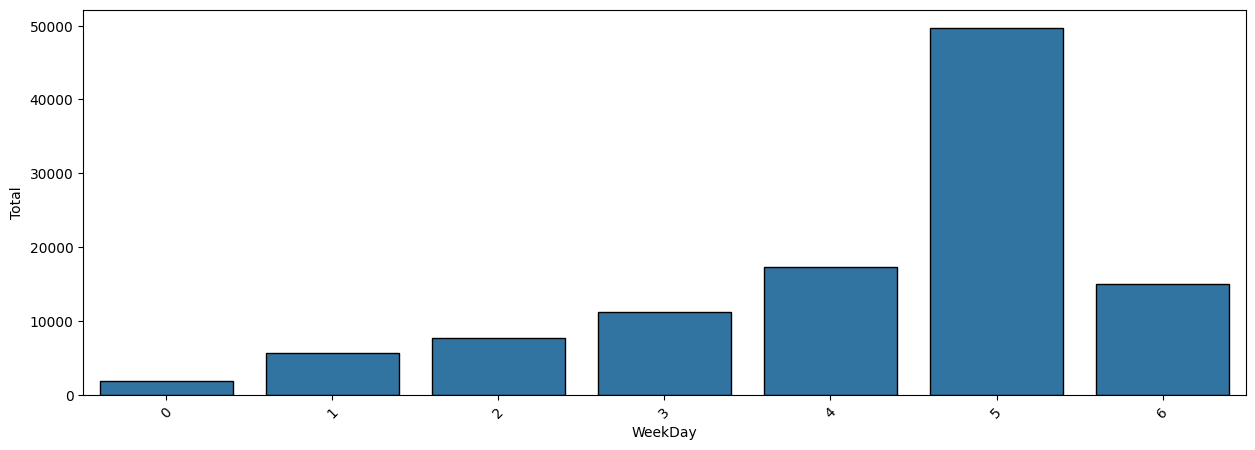

In [19]:
# Добавим дополнительные временные признаки дня недели и часа, и определим наиболее прибыльниые дни
new_df['WeekDay']=new_df['Date'].dt.weekday
new_df['Hour']=new_df['Date'].dt.hour

df_group = new_df.groupby(['WeekDay'])['Total'].sum()
df = pd.DataFrame({'WeekDay': df_group.index, 'Total': df_group.values})

plt.figure(figsize=(15,5))
g=sns.barplot(data=df, x="WeekDay", y="Total")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g

Ожидаемо: основную выручку приносит суббота и является наиболее загруженным днем

<Axes: xlabel='Hour', ylabel='Total'>

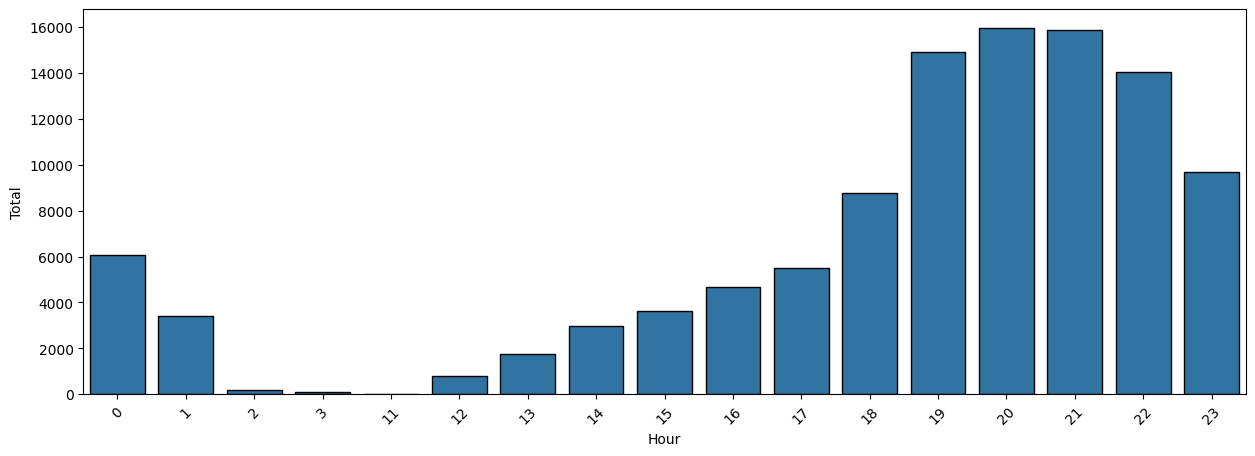

In [20]:
# Определим наиболее загруженные часы работы бара
df_group = new_df.groupby(['Hour'])['Total'].sum()
df = pd.DataFrame({'Hour': df_group.index, 'Total': df_group.values})

plt.figure(figsize=(15,5))
g=sns.barplot(data=df, x="Hour", y="Total")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g

Ожидаемо: наиболее загруженным и прибыльным является время с 18.00 до 00.00

In [21]:
# Удалим, очевидно, скореллированный признак Regist (с признаком Location)
data = new_df.drop('Regist', axis=1)
# Удалим столбец datetime
data = data.drop('Date', axis=1)

#### 4.2 Проанализируем продукты бара
Некторые продукты имеют слишком большое число подвидов: Product - 286, Subspecies - 38, Part - 67

In [22]:
data.nunique()

Staff          22
Quantity        4
Total         176
Product       286
Location        6
Type           17
Subspecies     38
Part           67
WeekDay         7
Hour           17
dtype: int64

Оставим самые популярные значения. Для остальных применим *other

In [23]:
# Вид напитка (продукта)
count_product = (data['Product'].value_counts(normalize = True))
reviewer_count_product = count_product.sort_values(ascending = False)
reviewer_product_pop = reviewer_count_product.nlargest(15).index
data['Product'] = data['Product'].apply(lambda x: x if x in reviewer_product_pop else 'Other Product')
data['Product'].value_counts()

Product
Other Product          4584
Birra Moretti          1360
Amstel                 1307
Laine Brew Co          1214
Smirnoff Black          921
Brixton Brewery         786
Guinness                772
Tanqueray               745
Orchard Thieves         662
Beavertown              465
Jose Cuervo             343
Baby Guinness           318
Old Mout Cider          282
Sailor Jerry Spiced     263
Pepsi Max               164
Pepsi                   160
Name: count, dtype: int64

Наиболее популярными марками напитков являются: Birra Moretti, Amstel, фирменное Laine Brew Co, Smirnoff Black и т.д.

Разбивка списка на 15 основных позиций покрывает основную массу алкогольных напитков, доходя до безалкогольных, что является достаточным

<Axes: ylabel='Product'>

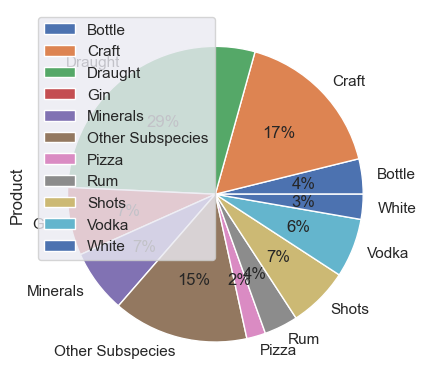

In [24]:
# Подвид напитка (продукта)
count_Subspecies = (data['Subspecies'].value_counts(normalize = True))
reviewer_count_Subspecies = count_Subspecies.sort_values(ascending = False)
reviewer_Subspecies_pop = reviewer_count_Subspecies.nlargest(10).index
data['Subspecies'] = data['Subspecies'].apply(lambda x: x if x in reviewer_Subspecies_pop else 'Other Subspecies')
data['Subspecies'].value_counts()

sns.set(font_scale = 1)
df_nationality =data.groupby(['Subspecies']).count() 
df_nationality.plot(kind='pie', y='Product' , autopct='%1.0f%%')

Наиболее продаваемыми являются разливные напитки (Draught) и крафтовые (Craft)

Разбивка списка на 10 основных позиций покрывает основную массу подвидов, доходя до закусок, что является достаточным

<Axes: ylabel='Product'>

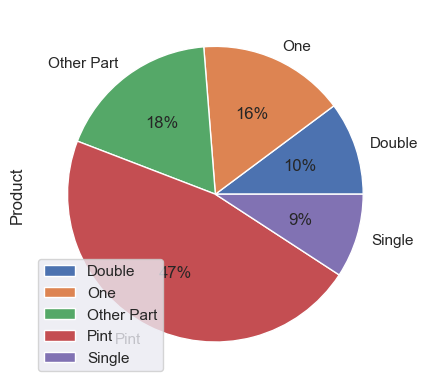

In [25]:
# Порция напитка (продукта)
count_Part = (data['Part'].value_counts(normalize = True))
reviewer_count_Part = count_Part.sort_values(ascending = False)
reviewer_Part_pop = reviewer_count_Part.nlargest(4).index
data['Part'] = data['Part'].apply(lambda x: x if x in reviewer_Part_pop else 'Other Part')
data['Part'].value_counts()

sns.set(font_scale = 1)
df_nationality =data.groupby(['Part']).count() 
df_nationality.plot(kind='pie', y='Product' , autopct='%1.0f%%')

Наиболее продаваемой является порция - пинта (Pint); так же, часто покупают продукцию в заводской упаковке (таре) (что мы ранее обозначили как One) и являющиеся производными от этих видов - двойные, пол порции и т.п.

Разбивка списка на 4 основных позиций покрывает основную массу подвидов порций, доходя до частей целых, что является достаточным



#### 4.3 Определим какому из барменов / официантов можно выдать премию по окончанию месяца за наибольшую выручку

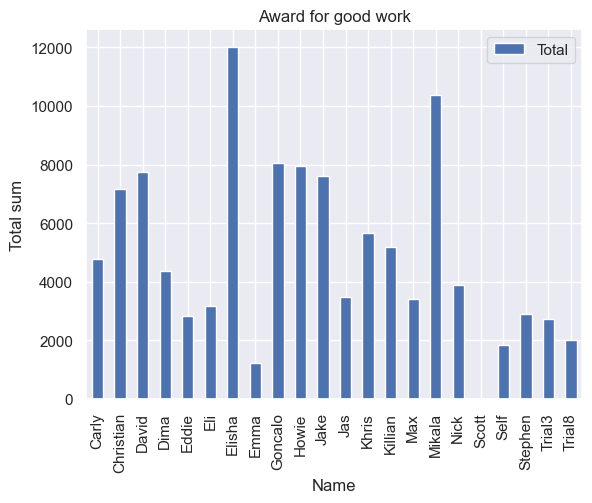

In [26]:
prize = pd.pivot_table(             
                       data,
                       index=["Staff"],
                       values=["Total"],
                       aggfunc=np.sum
                       )

prize.sort_values(by='Total', ascending=0)

prize.plot(kind = 'bar', title = 'Award for good work', xlabel = 'Name', ylabel = 'Total sum')
plt.show()

Первые двое: Elisha, Mikala будут премированы

#### 5. Произведем кодирование данных

In [27]:
data.head(1)

,Staff,Quantity,Total,Product,Location,Type,Subspecies,Part,WeekDay,Hour
1,Carly,1.0,6.5,Sailor Jerry Spiced,Main Bar Right,Spirit,Rum,Single,2,0


In [28]:
# Закодируем категориальные признаки с помощью простого горячего кодирования
data = pd.get_dummies(data, columns=['Staff', 'Product', 'Type', 'Subspecies', 'Part'])
data.head()

,Quantity,Total,Location,WeekDay,Hour,Staff_Carly,Staff_Christian,Staff_David,Staff_Dima,Staff_Eddie,...,Subspecies_Pizza,Subspecies_Rum,Subspecies_Shots,Subspecies_Vodka,Subspecies_White,Part_Double,Part_One,Part_Other Part,Part_Pint,Part_Single
1,1.0,6.50,Main Bar Right,2,0,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,1.0,7.40,Main Bar Middle,2,0,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,1.0,6.15,Main Bar Right,2,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1.0,6.15,Main Bar Right,2,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,1.0,6.15,Main Bar Middle,2,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [29]:
# Выделим целевой признак
X = data.drop('Location',axis =1)  
y = data['Location']

#### 6. Стандартизация и тепловая карта

In [30]:
# Стандартизируем данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<Axes: >

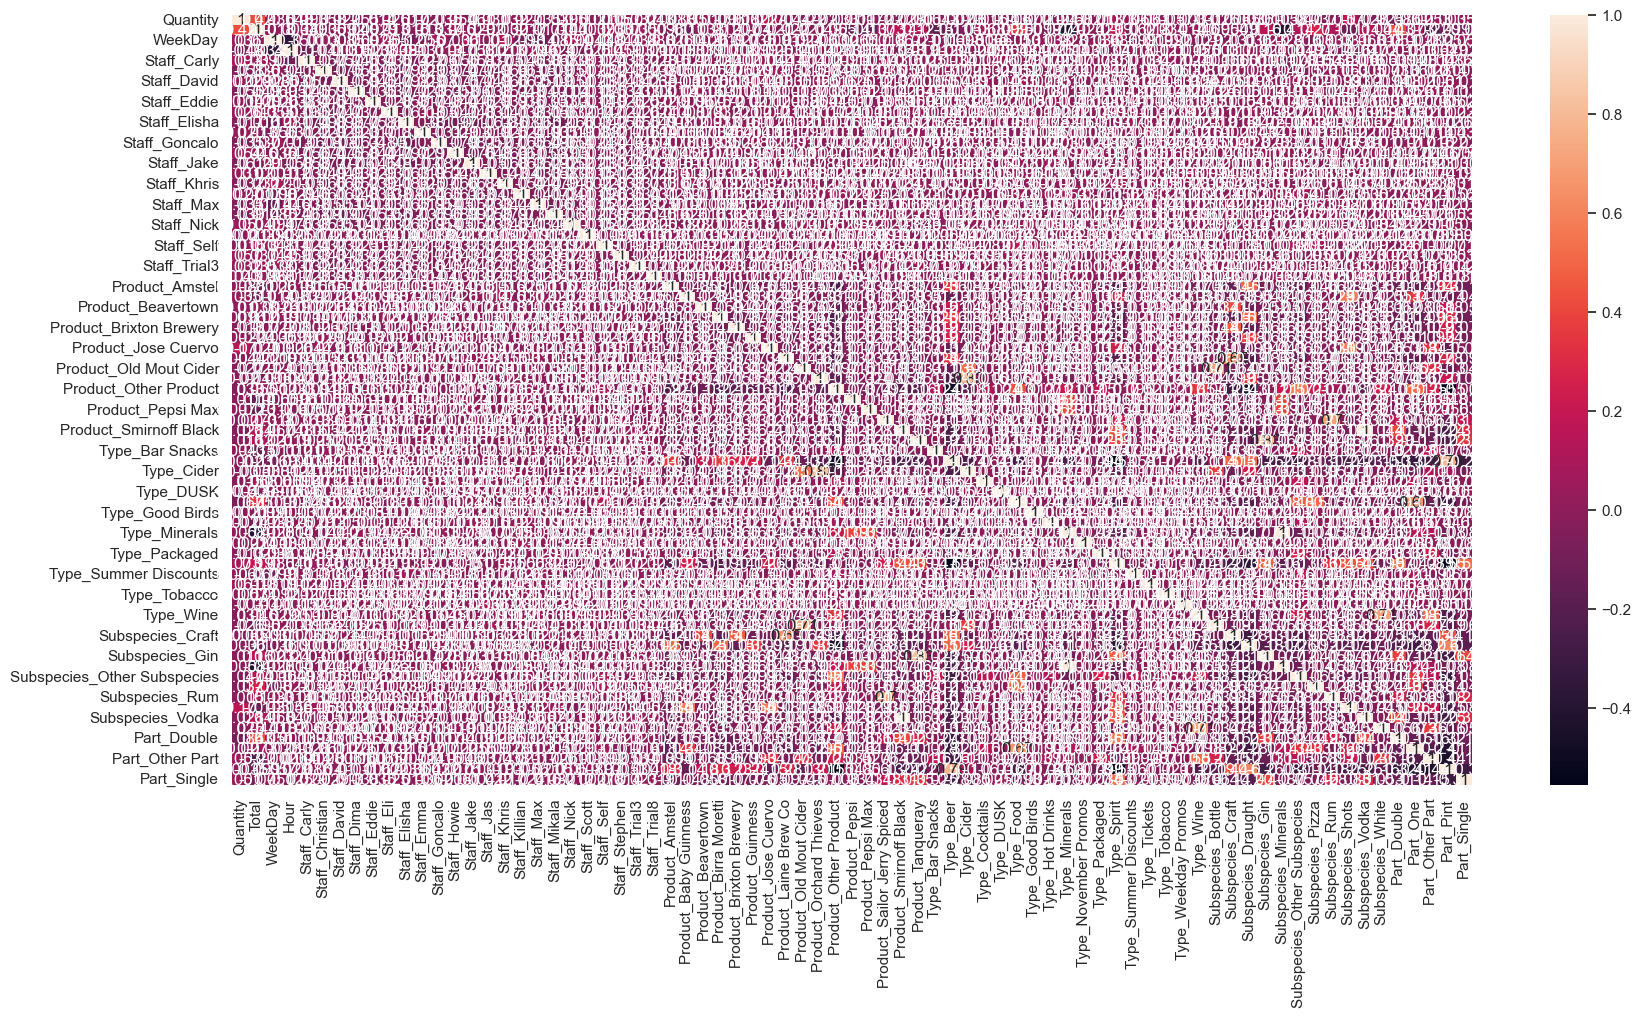

In [31]:
# Построим тепловую карту признаков
import matplotlib.pyplot as plt
import seaborn as sns

X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True)

In [32]:
# Карта малоинформативна для визуального анализа. Воспользуемся поиском корелляций програмно
# Выделим сильно скореллированные данные
X_scaled_df.corr().unstack().sort_values(ascending=False).drop_duplicates()

Quantity                 Quantity                  1.000000
Subspecies_Vodka         Product_Smirnoff Black    0.997111
Product_Tanqueray        Subspecies_Gin            0.826063
Product_Orchard Thieves  Type_Cider                0.825010
Part_Pint                Type_Beer                 0.785151
                                                     ...   
Part_Other Part          Part_Pint                -0.436715
Product_Other Product    Type_Beer                -0.478987
Type_Spirit              Type_Beer                -0.527719
Part_Pint                Type_Spirit              -0.554654
                         Product_Other Product    -0.554747
Length: 2706, dtype: float64

In [33]:
# Примем порог корелляции в 90%
# Удалим один из пары признаков
X_scaled_df = X_scaled_df.drop('Subspecies_Vodka', axis=1)

#### 7. РСА

In [34]:
# Теперь понизим размерность данных — возьмём для этого метод главных компонент (PCA) как самый простой и популярный
# Определим минимальное число компонент, которые суммарно могут объяснить как минимум 85% разброса данных
from sklearn.decomposition import PCA

pca = PCA(n_components=0.85, random_state=42).fit(X_scaled)
print(len(pca.components_))
print(f'При этом, первая компонента обьясняет {round(pca.explained_variance_ratio_[0]*100, 2)} % дисперсии')

44
При этом, первая компонента обьясняет 6.82 % дисперсии


<Axes: >

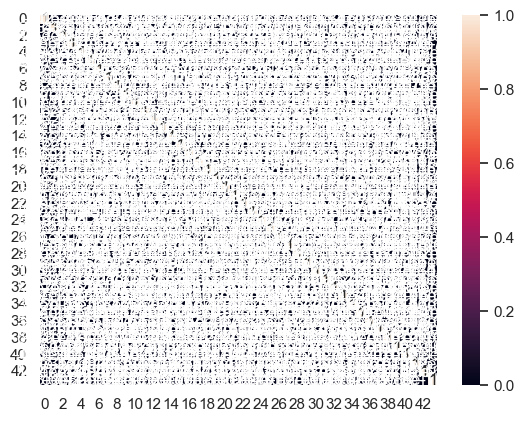

In [35]:
X_pca = pca.fit_transform(X_scaled)
corrmat = np.corrcoef(X_pca.transpose())
sns.heatmap(corrmat, annot=True)

In [36]:
# С помощью коэффициента силуэта, подберем оптимальное количество кластеров
# Для кластеризации используем алгоритм k-means++
# В качестве значения параметра random_state возьмем число 1
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = [29, 30, 31, 32, 33]

for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state = 1)
    kmeans.fit(X_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(i, silhouette_avg)

29 0.2525868512885087
30 0.2571885364573037
31 0.24357302853330898
32 0.2391485107859554
33 0.24468628159170286


<Axes: xlabel='K-Means_Cluster_ID', ylabel='Hour'>

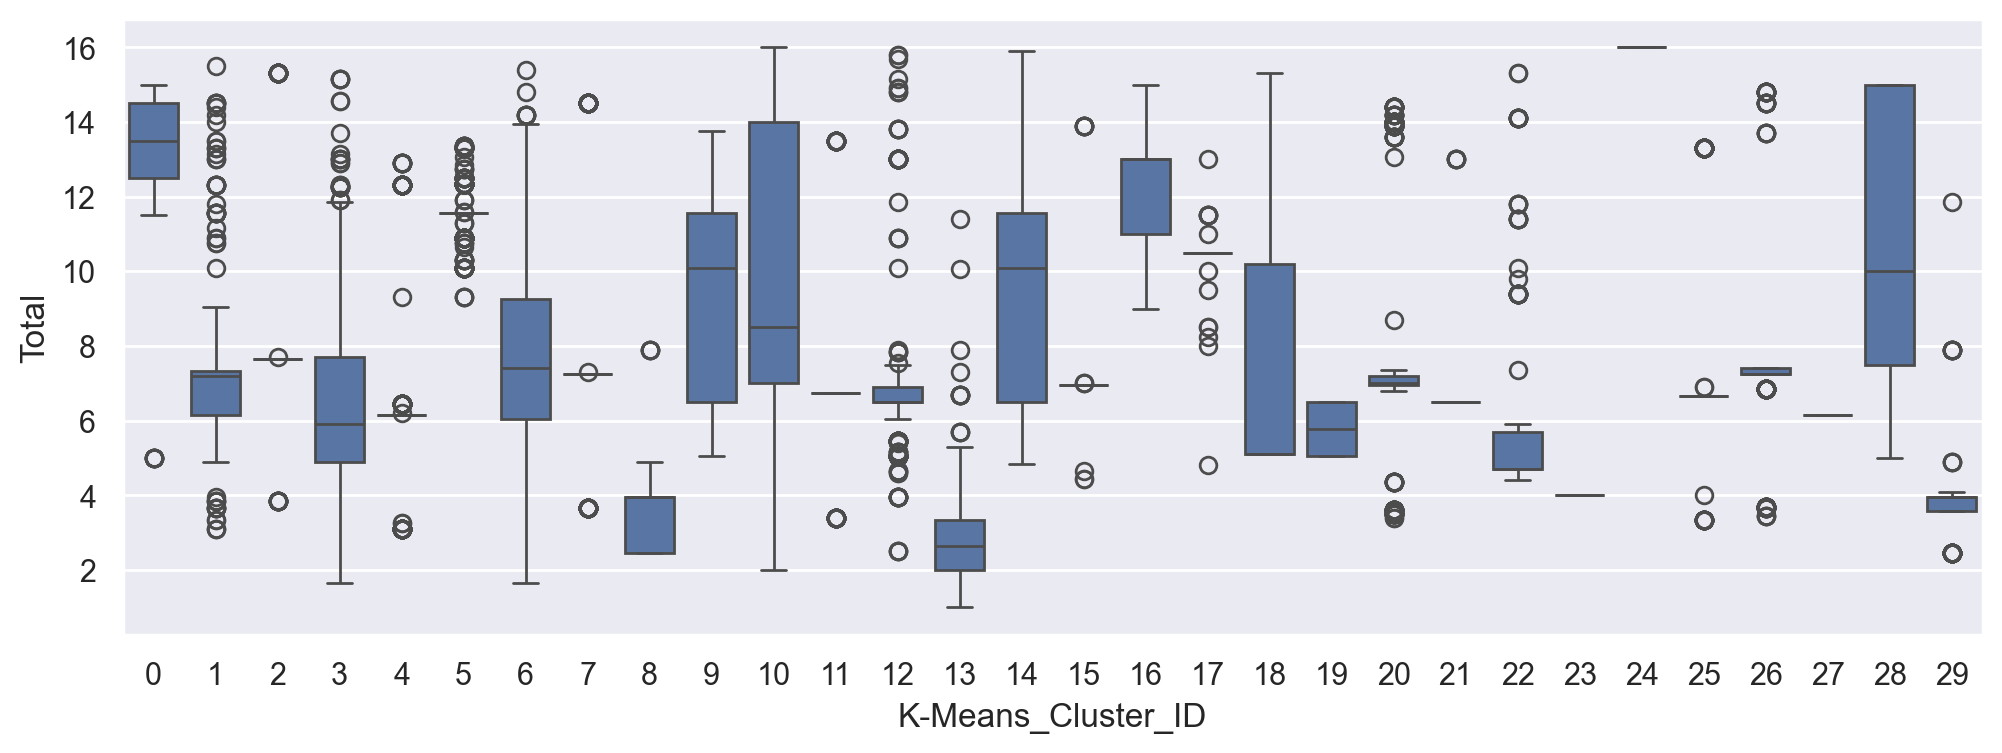

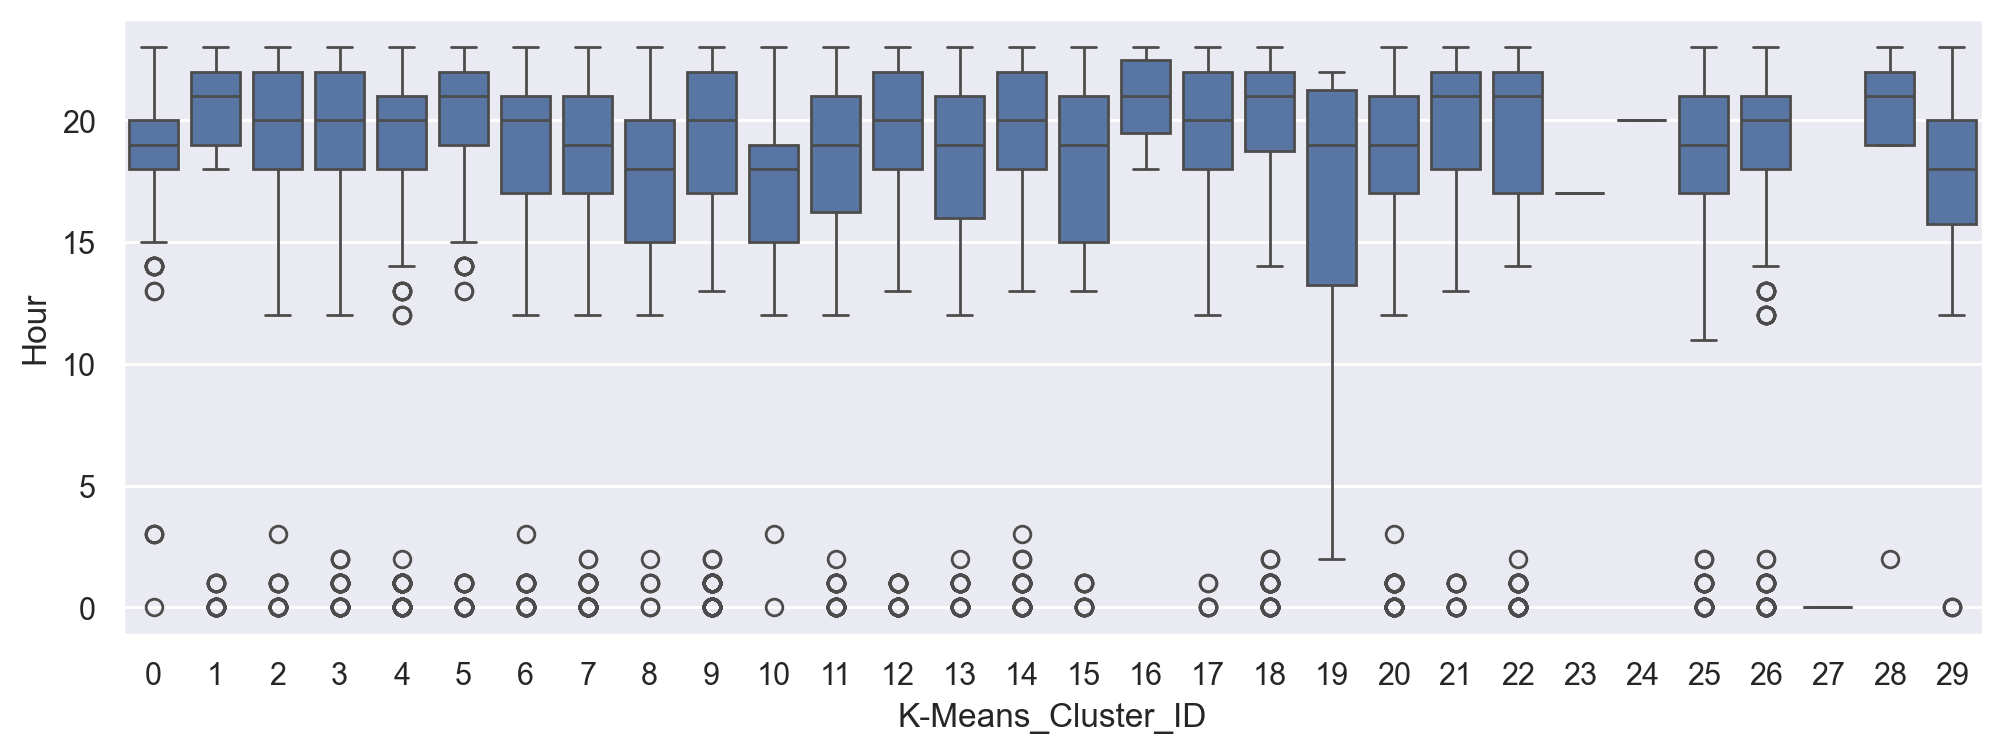

In [37]:
# Примем 30 кластеров как оптимальное количество
# Определим в какой зоне максимальная прибыль и в какой час
kmeans = KMeans(n_clusters=30, random_state=1)
kmeans.fit(X_pca)
data['K-Means_Cluster_ID'] = kmeans.labels_
plt.figure(figsize=(12,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='Total', data=data)
plt.figure(figsize=(12,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='Hour', data=data)

In [44]:
# Выведем полученные данные
K_Means_countries = data[data['K-Means_Cluster_ID'] == 0]
K_Means_countries.sort_values(by = 'Total', ascending=False)

,Quantity,Total,Location,WeekDay,Hour,Staff_Carly,Staff_Christian,Staff_David,Staff_Dima,Staff_Eddie,...,Subspecies_Rum,Subspecies_Shots,Subspecies_Vodka,Subspecies_White,Part_Double,Part_One,Part_Other Part,Part_Pint,Part_Single,K-Means_Cluster_ID
550,1.0,15.0,Main Bar Right,3,19,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
7510,1.0,15.0,Main Bar Right,5,16,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
2403,1.0,15.0,Arcade Right,5,19,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
8681,1.0,15.0,Arcade Left,5,21,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
4703,1.0,14.5,Main Bar Middle,1,18,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5072,1.0,5.0,Main Bar Middle,2,17,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0
4670,1.0,5.0,Main Bar Middle,1,18,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
536,1.0,5.0,Main Bar Middle,3,19,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0
13914,1.0,5.0,Main Bar Right,5,21,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0


#### Вывод: наиболее популярными и прибыльними являются зоны Main Bar Middle/Left/Right и зона аркадных автоматов в субботу, воскресенье и понедельник с 18 и до 23 часов, с официантами Elisha и Mikala, с разливными и крафтовыми напитками.